In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Parte 1: Análisis con Python (Pandas y Seaborn)

# En esta primera parte, usaremos Python para replicar el análisis. El cuaderno Jupyter (`U3 __ Análisis univariado canciones Spotify.ipynb`) te servirá 
# como guía detallada y solución.

# Fase 1: Carga y Limpieza de Datos

# Carga el dataset `MostStreamedSpotifySongs2024.csv`. ¡Cuidado con la codificación! (Prueba con `encoding='latin-1'`).

df = pd.read_csv('U4__MostStreamedSpotifySongs2024.csv', encoding='latin-1')


# La columna `Spotify Streams` está como texto (ej. "390,470,936"). Límpiala quitando las comas y conviértela a un tipo numérico (float).

df['Spotify Streams'] = df['Spotify Streams'].str.replace(',', '', regex=False)
df['Spotify Streams'] = pd.to_numeric(df['Spotify Streams'], errors='coerce').astype(float)

print(df['Spotify Streams'].head())
print(df['Spotify Streams'].dtype)

# Convierte `Release Date` a un formato de fecha y hora (datetime) usando `pd.to_datetime()`.

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

print(df['Release Date'].head())
print(df['Release Date'].dtype)

0    3.904709e+08
1    3.237039e+08
2    6.013093e+08
3    2.031281e+09
4    1.070349e+08
Name: Spotify Streams, dtype: float64
float64
0   2024-04-26
1   2024-05-04
2   2024-03-19
3   2023-01-12
4   2024-05-31
Name: Release Date, dtype: datetime64[ns]
datetime64[ns]


Track              Blinding Lights
Album Name         Blinding Lights
Artist                  The Weeknd
Spotify Streams       4281468720.0
Name: 55, dtype: object


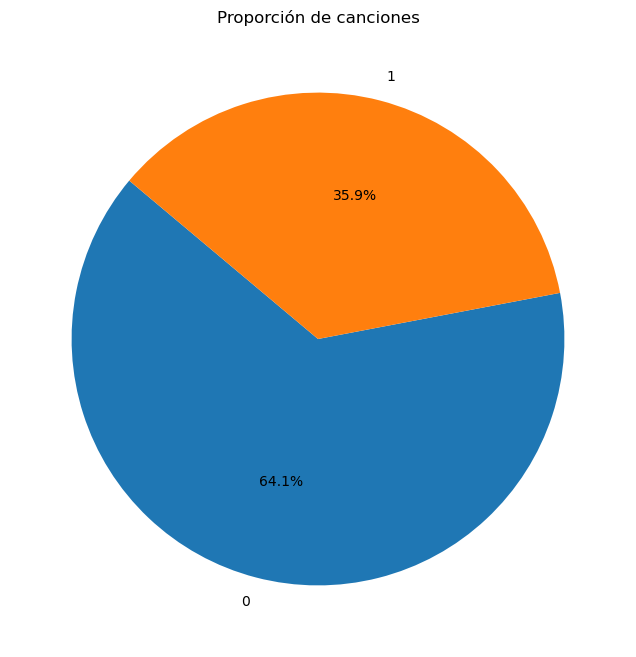

C:\Users\aleja\AppData\Local\Temp\ipykernel_18716\3613265892.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', order=years_sorted, palette='viridis')


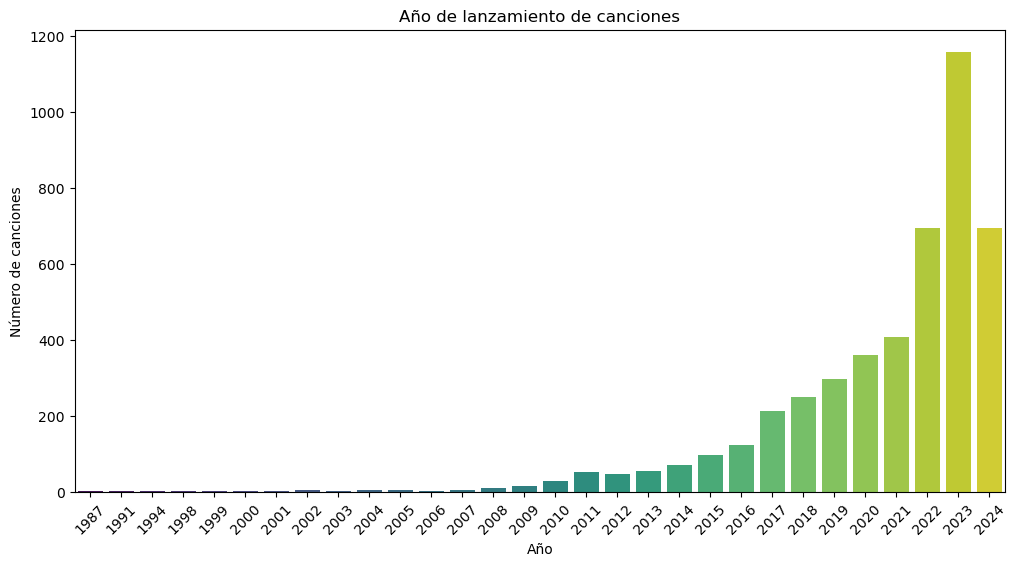

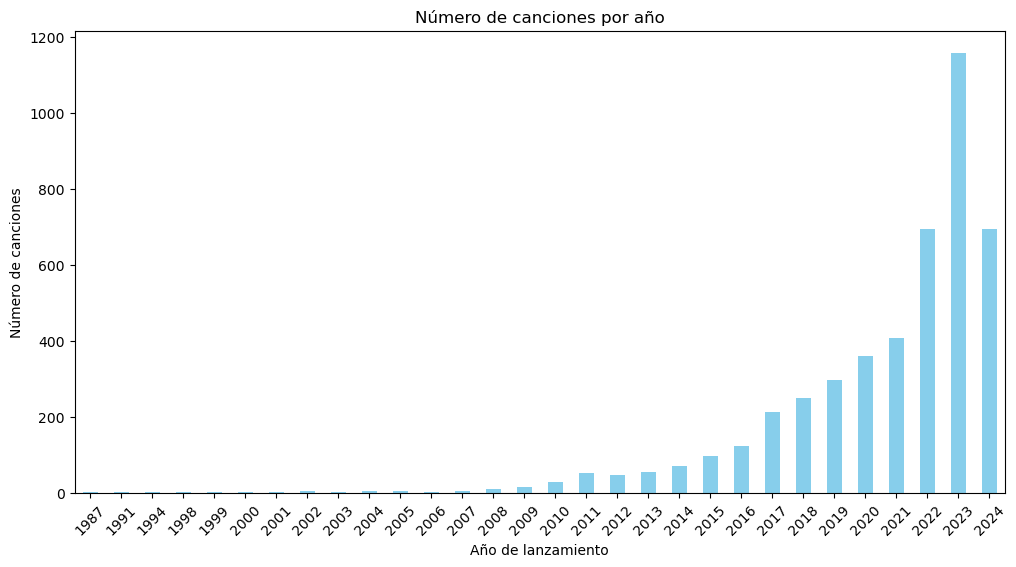

In [2]:
# Fase 2: Análisis Univariado

# ¿Cuál es la canción con más reproducciones (`Spotify Streams`)? (Pista: usa `.idxmax()`).

idx_max = df['Spotify Streams'].idxmax()

print(df.loc[idx_max, ['Track', 'Album Name', 'Artist', 'Spotify Streams']])

# Crea un gráfico de pastel (pie chart) para ver la proporción de canciones con `Explicit Track` (Verdadero vs. Falso).

# Obtener los datos para el gráfico
counts_explicit_track = df['Explicit Track'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(counts_explicit_track, labels=counts_explicit_track.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de canciones')
plt.ylabel('') # Ocultar la etiqueta del eje y
plt.show()

# Extrae el año de `Release Date` (pista: usa `.dt.year`). Crea un gráfico de barras (`sns.countplot` o `value_counts().plot(kind='bar')`) # para ver cuántas canciones de la lista hay por año.

df['Year'] = df['Release Date'].dt.year
# Esto crea una columna Year con solo la fecha, recogida de la columna correspondiente de Release Date

# Ordenar los años de forma cronológica
years_sorted = sorted(df['Year'].dropna().unique())

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', order=years_sorted, palette='viridis')
plt.title('Año de lanzamiento de canciones')
plt.xlabel('Año')
plt.ylabel('Número de canciones')
plt.xticks(rotation=45)  # rota las etiquetas para que no se amontonen
plt.show()

# Contar cuántas canciones hay por año y ordenar por año
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='skyblue')

# Personalizar el gráfico
plt.title('Número de canciones por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de canciones')
plt.xticks(rotation=45)  # rotar etiquetas para que no se amontonen
plt.show()

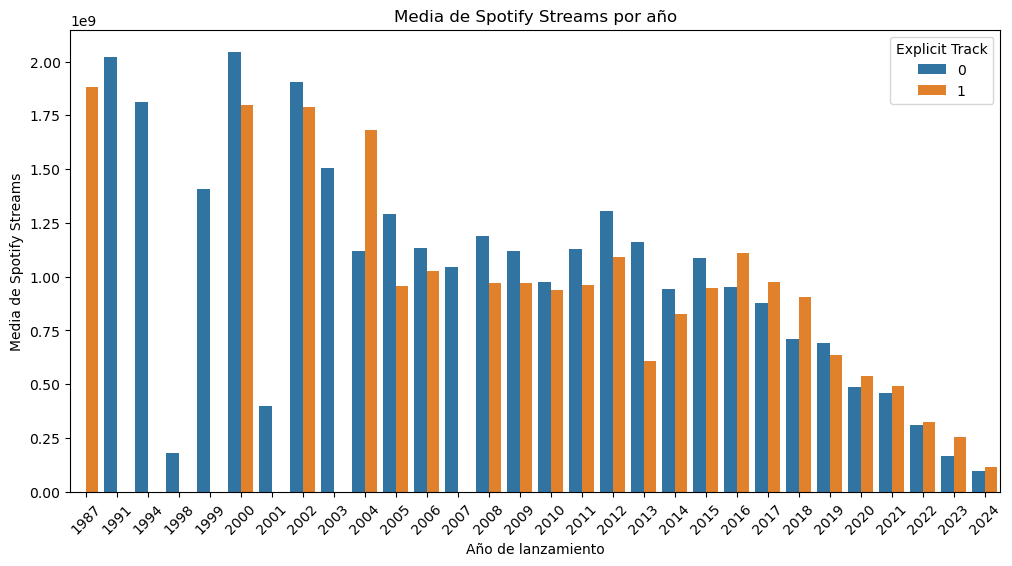

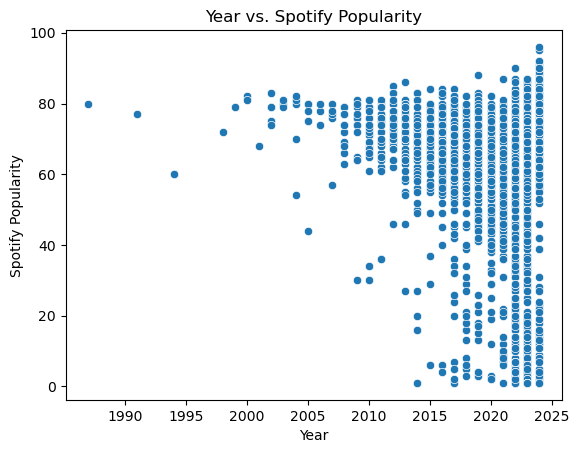

In [3]:
# Fase 3: Análisis Bivariado

# Crea un gráfico de barras (`sns.barplot`) que muestre la media de `Spotify Streams` (eje Y) por `Year` (eje X).

plt.figure(figsize=(12,6))

# Gráfico de barras mostrando la media de Spotify Streams por Year

# Con 'hue' se añade una separación por color según otra variable.
# En este caso, 'Explicit Track' diferencia las canciones explícitas (True) de las no explícitas (False),
# mostrando dos barras por año para comparar la media de Spotify Streams.
sns.barplot(data=df, x='Year', y='Spotify Streams', estimator='mean', errorbar=None, hue='Explicit Track', order=sorted(df['Year'].dropna().unique()))

plt.title('Media de Spotify Streams por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Media de Spotify Streams')
plt.xticks(rotation=45)
plt.show()

# Mejora el gráfico anterior: añade `Explicit Track` al parámetro `hue`. ¿Qué patrones observas? ¿Las canciones explícitas tienen más o menos reproducciones 
# de media a lo largo de los años?

# A lo largo de los años, las canciones explícitas van teniendo más reproducciones, antiguamente era al contrario, las que no eran explícitas eran las mas escuchadas

# Crea un scatter plot de `Year` vs. `Spotify Popularity`. ¿Ves alguna correlación?

# Relación entre (Year) y (Spotify Popularity)
sns.scatterplot(data=df, x='Year', y='Spotify Popularity')
plt.title('Year vs. Spotify Popularity')
plt.show()

# Se puede observar que la popularidad de Spotify se ha disparado conforme el paso del tiempo,
# ya que Spotify se ha vuelto muy famoso


In [4]:
print(df.head())

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score  Spotify Streams  \
0   2024-04-26  QM24S2402528             1        725.4     3.904709e+08   
1   2024-05-04  USUG12400910             2        545.9     3.237039e+08   
2   2024-03-19  QZJ842400387             3        538.4     6.013093e+08   
3   2023-01-12  USSM12209777             4        444.9     2.031281e+09   
4   2024-05-31  USUG12403398             5        423.3     1.070349e+08   

  Spotify Playlist Count Spotify Playlist Reach  ...  Deezer Playlis